In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [9]:
path = "../data/clean/listings_clean.csv"
df = pd.read_csv(path)
df.head()

,price,room_type,neighbourhood,minimum_nights,availability_365,number_of_reviews,host_id,host_listings_count,latitude,longitude
0,66.0,Private room,Sunnyside,30,77,16,317540555,3,40.746980,-73.917630
1,76.0,Private room,East Village,30,168,20,4765305,8,40.721470,-73.982700
2,97.0,Entire home/apt,Ozone Park,30,364,93,295370107,2,40.682300,-73.845450
3,60.0,Private room,Williamsburg,30,187,26,14890430,1,40.713163,-73.943077
4,425.0,Entire home/apt,Crown Heights,30,224,1,7728754,1,40.674120,-73.941230


In [10]:
df.describe()

,price,minimum_nights,availability_365,number_of_reviews,host_id,host_listings_count,latitude,longitude
count,20905.000000,20905.000000,20905.000000,20905.000000,2.090500e+04,20905.000000,20905.000000,20905.000000
mean,210.379000,26.850514,250.507534,37.263621,2.106856e+08,93.139010,40.726598,-73.943377
std,184.039583,23.341548,107.011522,85.877370,2.054277e+08,258.649848,0.059080,0.060683
min,10.000000,1.000000,0.000000,0.000000,1.678000e+03,1.000000,40.500366,-74.251907
25%,88.000000,30.000000,170.000000,0.000000,2.514138e+07,1.000000,40.684814,-73.982920
50%,150.000000,30.000000,275.000000,6.000000,1.207625e+08,3.000000,40.725940,-73.952770
75%,266.000000,30.000000,346.000000,39.000000,4.079497e+08,20.000000,40.762964,-73.921680
max,1336.000000,729.000000,365.000000,3736.000000,7.214431e+08,1148.000000,40.912017,-73.711822


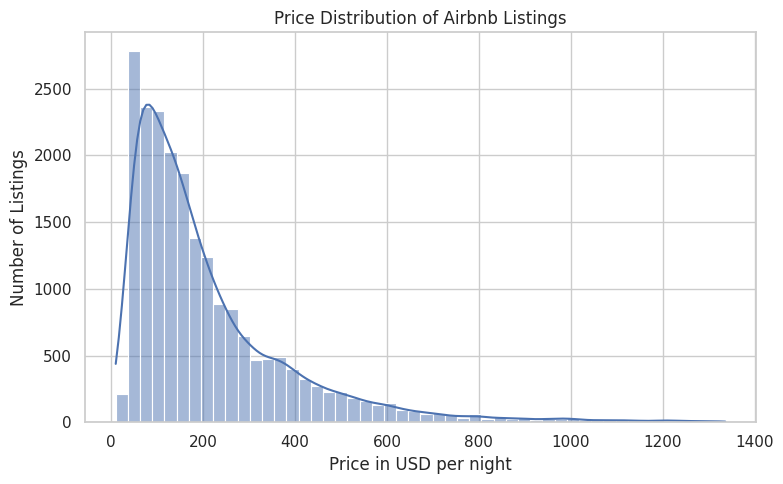

In [13]:
# Price distribution

plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Price Distribution of Airbnb Listings")
plt.xlabel("Price in USD per night")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

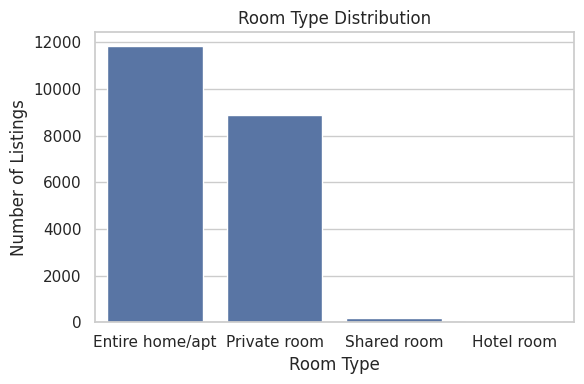

In [14]:
# Type of room distributiom

plt.figure(figsize=(6, 4))
sns.countplot(
    data=df,
    x="room_type",
    order=df["room_type"].value_counts().index
)
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()


In [15]:
# Find the neighbourhoods with the most listings
# this is to show where Airbnb activity is concentrated in the city

top_neighbourhoods = (
    df["neighbourhood"]
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={"index": "neighbourhood", "neighbourhood": "listing_count"})
)

top_neighbourhoods


,listing_count,count
0,Bedford-Stuyvesant,1573
1,Midtown,1206
2,Harlem,1003
3,Hell's Kitchen,937
4,Upper East Side,887
5,Williamsburg,806
6,Upper West Side,789
7,Bushwick,769
8,Crown Heights,664
9,Chelsea,510


In [17]:
# Top 10 neighbourhoods by listing count
top_neighbourhoods = (
    df["neighbourhood"]
    .value_counts()
    .head(10)
    .rename_axis("neighbourhood")     # turns the index into a column name
    .reset_index(name="listing_count")  # count column called listing_count
)

top_neighbourhoods.head(), top_neighbourhoods.columns



(        neighbourhood  listing_count
 0  Bedford-Stuyvesant           1573
 1             Midtown           1206
 2              Harlem           1003
 3      Hell's Kitchen            937
 4     Upper East Side            887,
 Index(['neighbourhood', 'listing_count'], dtype='object'))

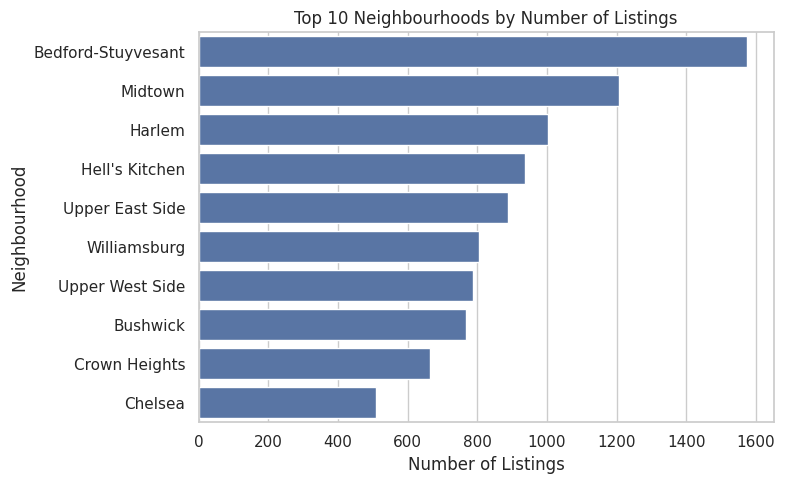

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_neighbourhoods,
    x="listing_count",
    y="neighbourhood"
)
plt.title("Top 10 Neighbourhoods by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Neighbourhood")
plt.tight_layout()
plt.show()


In [19]:
# average price by neighbourhood
# this is to find premium areas from a pricing perspective

avg_price_by_neigh = (
    df.groupby("neighbourhood")["price"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

avg_price_by_neigh


,neighbourhood,price
0,Fort Wadsworth,600.000000
1,NoHo,530.550000
2,Tribeca,526.673684
3,SoHo,507.558333
4,Theater District,450.106796
5,Greenwich Village,437.100000
6,Battery Park City,411.296296
7,Financial District,406.917143
8,Midtown,398.058872
9,West Village,387.733906


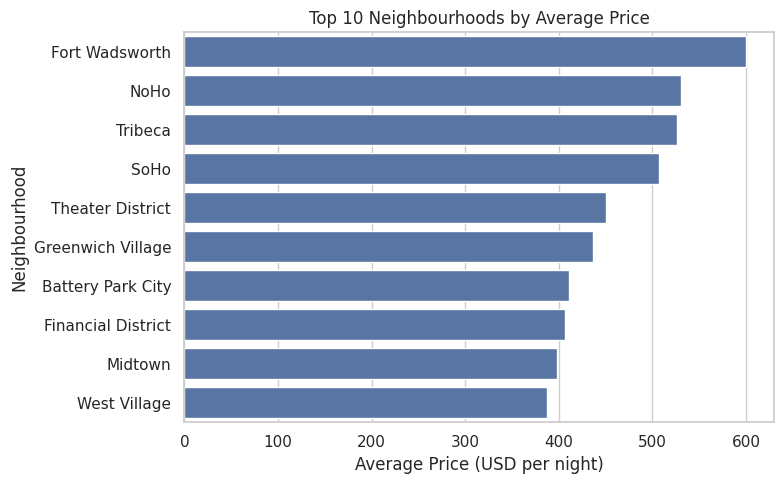

In [20]:
# Plot top 10 neighbourhoods by average price

plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_price_by_neigh,
    x="price",
    y="neighbourhood"
)
plt.title("Top 10 Neighbourhoods by Average Price")
plt.xlabel("Average Price (USD per night)")
plt.ylabel("Neighbourhood")
plt.tight_layout()
plt.show()

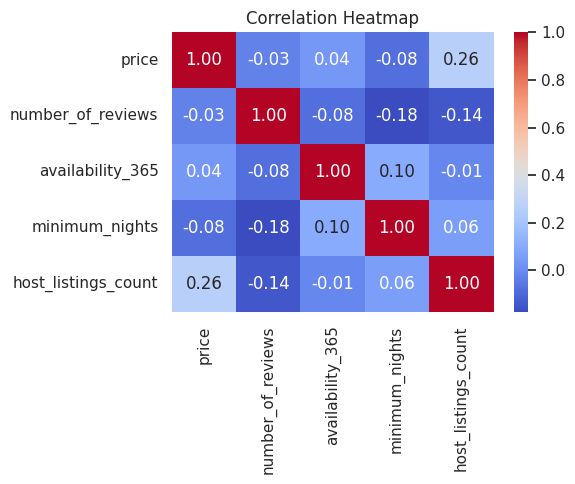

In [ ]:
# correlations between price, demand proxies, and supply
# which factors move together

corr_cols = ["price", "number_of_reviews", "availability_365",
             "minimum_nights", "host_listings_count"]

corr_df = df[corr_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


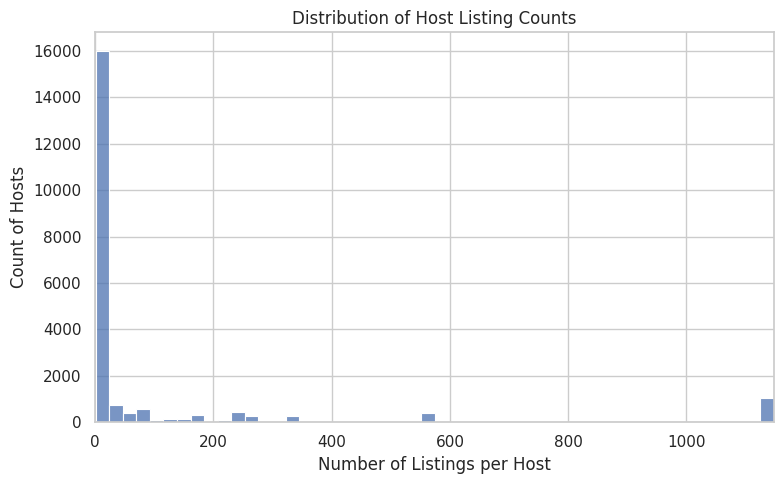

In [ ]:
# Show how many listings hosts typically manage
# casual hosts vs professional operators

plt.figure(figsize=(8, 5))
sns.histplot(df["host_listings_count"], bins=50)
plt.xlim(0, df["host_listings_count"].quantile(0.99))  # clip extreme values for readability
plt.title("Distribution of Host Listing Counts")
plt.xlabel("Number of Listings per Host")
plt.ylabel("Count of Hosts")
plt.tight_layout()
plt.show()


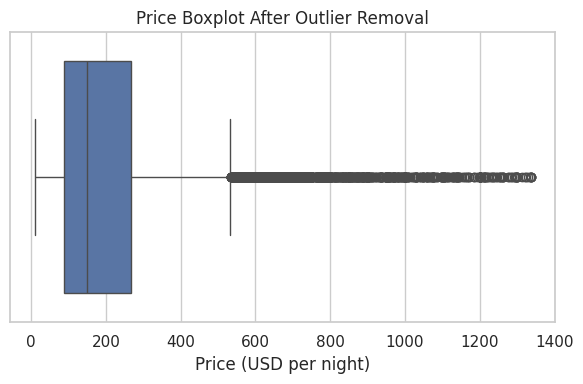

In [23]:
# What: Visualize price spread after outlier removal
# Why: Confirm that prices are in a reasonable range for analysis

plt.figure(figsize=(6, 4))
sns.boxplot(x=df["price"])
plt.title("Price Boxplot After Outlier Removal")
plt.xlabel("Price (USD per night)")
plt.tight_layout()
plt.show()


In [25]:
# Create a SQLite database file and write the cleaned dataframe into it

conn = sqlite3.connect("../airbnb.db")

df.to_sql("airbnb", conn, if_exists="replace", index=False)

20905

In [ ]:
# Neighbourhoods with the highest average nightly price

query1 = """
SELECT neighbourhood, AVG(price) AS avg_price
FROM airbnb
GROUP BY neighbourhood
ORDER BY avg_price DESC
LIMIT 10;
"""

top_expensive_neigh = pd.read_sql(query1, conn)
top_expensive_neigh


,neighbourhood,avg_price
0,Fort Wadsworth,600.000000
1,NoHo,530.550000
2,Tribeca,526.673684
3,SoHo,507.558333
4,Theater District,450.106796
5,Greenwich Village,437.100000
6,Battery Park City,411.296296
7,Financial District,406.917143
8,Midtown,398.058872
9,West Village,387.733906


In [ ]:
# Compare average price across room types

query2 = """
SELECT room_type, AVG(price) AS avg_price
FROM airbnb
GROUP BY room_type;
"""

avg_price_room_type = pd.read_sql(query2, conn)
avg_price_room_type


,room_type,avg_price
0,Entire home/apt,269.894919
1,Hotel room,471.261905
2,Private room,131.636148
3,Shared room,111.136364


In [ ]:
# What: Find the hosts managing the most listings

query3 = """
SELECT host_id, COUNT(*) AS listing_count
FROM airbnb
GROUP BY host_id
ORDER BY listing_count DESC
LIMIT 10;
"""

top_hosts = pd.read_sql(query3, conn)
top_hosts


,host_id,listing_count
0,107434423,1028
1,3223938,384
2,446820235,272
3,51501835,229
4,533234561,220
5,162280872,215
6,35491667,173
7,22541573,157
8,137358866,138
9,61391963,128


In [ ]:
# Average number of reviews by neighbourhood

query4 = """
SELECT neighbourhood, AVG(number_of_reviews) AS avg_reviews
FROM airbnb
GROUP BY neighbourhood
ORDER BY avg_reviews DESC;
"""

avg_reviews_by_neigh = pd.read_sql(query4, conn)
avg_reviews_by_neigh.head(10)


,neighbourhood,avg_reviews
0,Huguenot,201.333333
1,New Dorp Beach,170.666667
2,DUMBO,129.466667
3,Columbia St,102.333333
4,Clifton,97.500000
5,Concourse,97.107143
6,Prospect Heights,95.112903
7,Flatiron District,93.744186
8,East Elmhurst,85.586207
9,Manhattan Beach,84.600000


In [ ]:
# close database connection
conn.close()
